In [2]:
# Calculating total distance covered by the player and his average speed at the interval of 5 seconds and
# writing in distance.txt and speed.txt file respectively

import csv
import math


#     creates a new empty distance.txt and speed.txt file

with open('distance.txt', 'w') as distance_file, open('speed.txt', 'w') as speed_file:
    pass


# Calculating distance covered by the player in each second

with open('data_set.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')   # reading data from the data set file
    line_count = 0                                     # initializing line counter
    total_distance_covered = 0                         # initializing total distance covered to zero
    distance_list, speed_list, x_axis_list, y_axis_list = [], [], [], []                 # creating empty distance and speed list
    
#     Taking initial position of the player from the user in the form of x-axis and y-axis
    initial_x = int(input("Enter initial position in x axis: \n"))
    initial_y = int(input("Enter initial position in y axis: \n"))
    x1, y1, x2, y2, distance = initial_x, initial_y, 0, 0, 0    # initializing position points and distance
    
#     Writing the fields in the distance.txt file
    with open('distance.txt', 'a') as distance_file:
        distance_file.write("Distance covered,Time(in seconds)\n")

#     Calculating distance from the position of the player obtained at every second
    for row in csv_reader:
        if line_count == 0:
            print(f'Field names given in the data set file are {", ".join(row)}\nCalculating total distance covered during the match....\n\n')
            
        else:
            x2 = float(row[0])
            y2 = float(row[1])
            time = int(row[2])
            x_axis_list.append(row[0])
            y_axis_list.append(row[1])
            distance = round((math.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2))), 2)    # distance rounded upto two decimal points
            distance_list.append(distance)
            total_distance_covered += distance
            with open('distance.txt', 'a') as distance_file:
                distance_file.write(f"{distance},{time}\n")    # writing distance in the file
            x1 = x2
            y1 = y2
        line_count += 1    # incrementing line counter
        
        
# Calculating speed at the interval of 5 seconds

with open('speed.txt', 'a') as speed_file:
    speed_file.write("Average speed,Time(in seconds)\n")    # Writing the fields in the speed.txt file
for i in range(0,5400,5):    # loop for every 5 second
    total_distance = 0
    speed = 0
    for j in range(5):
        total_distance += distance_list[i+j]
    speed = round((total_distance / 5), 2)
    speed_list.append(speed)
    with open('speed.txt', 'a') as speed_file:
        speed_file.write(f"{speed},{i+5}\n")    # writing speed in the file
        

# Analysing the data obtained from player's position during the match

total_distance_covered = round(total_distance_covered, 2)
first_half = distance_list[:2700]    # list of distance covered in first half
second_half = distance_list[2700:]    # list of distance covered in second half
first_half_distance = round(sum(first_half), 2)
second_half_distance = round(sum(second_half), 2)
first_half_speed = speed_list[:540]    # list of speed in first half
second_half_speed = speed_list[540:]    # list of speed in second half

print(f"The total distance covered by the player during 90 minutes of football match is {total_distance_covered} meters.\n\n")
print("Analysis of data obtained from player's position during the match:")
print(f"""
1.  Total distance covered in first half of the match i.e from 0 to 45 minutes is {first_half_distance} meters.
2.  Total distance covered in second half of the match i.e from 45 to 90 minutes is {second_half_distance} meters.
3.  Maximum velocity obtained during the match is {max(speed_list)} meters per second.
4.  Minimum velocity obtained during the match is {min(speed_list)} meters per second.
""")

Enter initial position in x axis: 
0
Enter initial position in y axis: 
0
Field names given in the data set file are X-axis, Y-axis, time(in seconds)
Calculating total distance covered during the match....


The total distance covered by the player during 90 minutes of football match is 53739.25 meters.


Analysis of data obtained from player's position during the match:

1.  Total distance covered in first half of the match i.e from 0 to 45 minutes is 25863.77 meters.
2.  Total distance covered in second half of the match i.e from 45 to 90 minutes is 27875.48 meters.
3.  Maximum velocity obtained during the match is 32.6 meters per second.
4.  Minimum velocity obtained during the match is 1.96 meters per second.



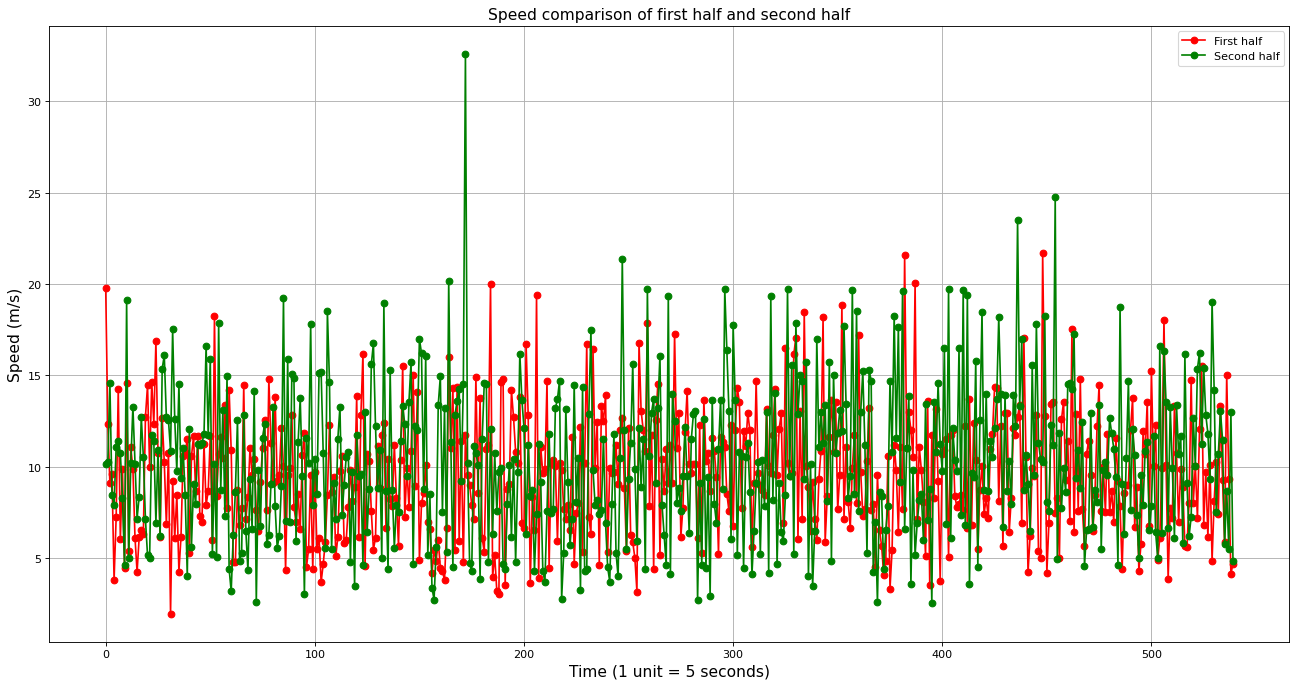

Press 'y' to see the detailed plot of speed or press 'n' to exit
y
Enter start time in seconds(from 1 to 5400) from where you want to see the plot.100
Enter end time in seconds(from 2 to 5400) till where you want to see the plot.120


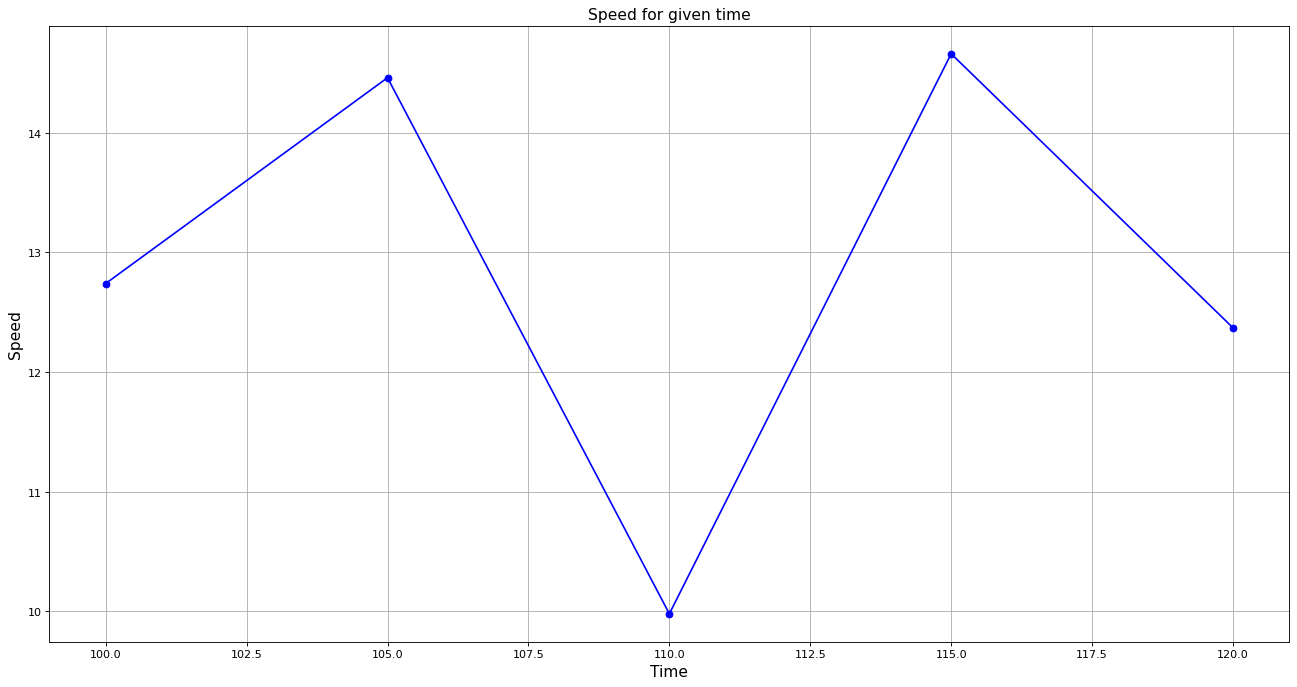

Press 'y' to see the detailed plot of speed or press 'n' to exit
n


In [4]:
# Visualization of speed of the player during the football match using Line chart

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

figure(figsize=(20, 10), dpi=80)    # Resizing plot size to demonstrate points

# Plotting speed of the player during first half
x = list(range(540))    # x-axis
y  = first_half_speed    # y-axis
plt.plot(x, y, color='red', marker='o', label = 'First half')    # plotting first half
plt.title('Speed comparison of first half and second half', fontsize=14)
plt.xlabel('Time (1 unit = 5 seconds)', fontsize=14)
plt.ylabel('Speed (m/s)', fontsize=14)
plt.legend()
plt.grid(True)

# Plotting speed of the player during second half
x = list(range(540))    # x-axis
y  = second_half_speed    # y-axis
plt.plot(x, y, color='green', marker='o', label = 'Second half')    # plotting second half
plt.legend()
plt.show()

# Taking user input to represent detailed plot of speed of the player at given time duration
while True:
    val = input("Press 'y' to see the detailed plot of speed or press 'n' to exit\n")    # getting user's choice
    if val == 'n':
        break    # breaking the loop when the choice is No
    elif val == 'y':    # plotting graph when the choice is Yes
        # taking start and time from the user to display the points for the given duration
        start_time = int(input("Enter start time in seconds(from 1 to 5400) from where you want to see the plot."))
        end_time = int(input("Enter end time in seconds(from 2 to 5400) till where you want to see the plot."))
        if start_time > end_time:    # error checkpoint for end time less than start time
            print("Sorry wrong input!\nThe start time can not be greater than the end time.\n")
        else:
            if start_time % 5 != 0:    # calculating range for plotting points in interval of 5 seconds
                start_time = int((start_time // 5) * 5) + 5
            end_time = int((end_time // 5) * 5)
            x = list(range(start_time, end_time+1, 5))    # x-axis
            start_time = int((start_time/5)-1)
            end_time = int(end_time / 5)
            y = speed_list[start_time : end_time]    # y-axis
            figure(figsize=(20, 10), dpi=80)    # Resizing plot size to demonstrate points
            plt.plot(x, y, color='blue', marker='o')    # plotting points
            plt.title('Speed for given time', fontsize=14)
            plt.xlabel('Time', fontsize=14)
            plt.ylabel('Speed', fontsize=14)
            plt.grid(True)
            plt.show()
    else:    # error checkpoint for choice other than 'y' or 'n'
        print("Wrong input!\n")
        

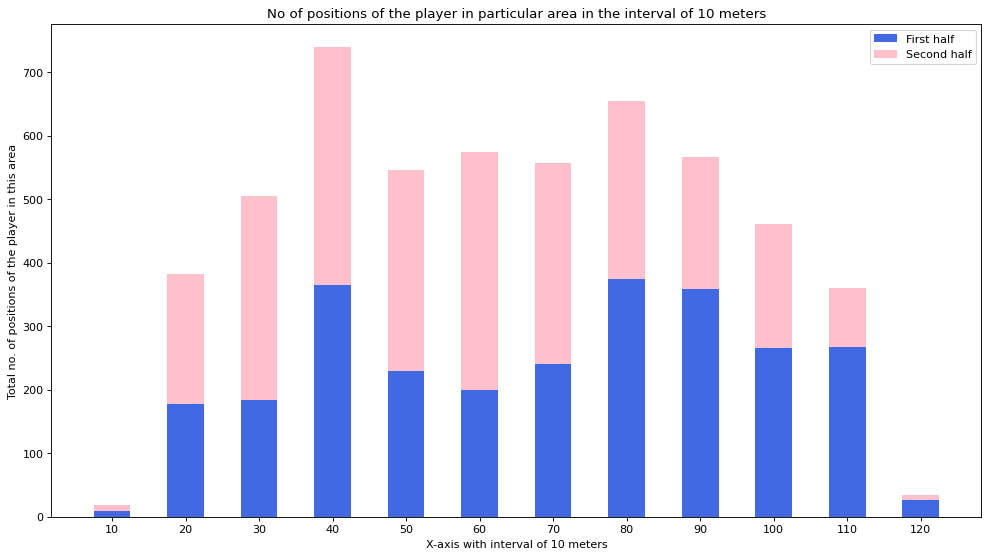

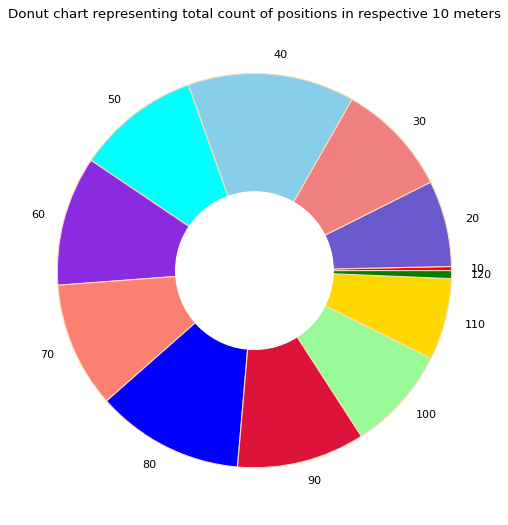


Field positions of the player during the match considering his team's goalpost is at position x=0:

1.  The player was playing in the defensive position also known as fullback, center back sweeper and wing back goalkeeper which is between 0 to 30 meters on the x-axis of football field for 905 number of times.

2.  The player was playing in the defensive midfielder or central midfielder position which is between 30 to 60 meters on the x-axis of football field for 1859 number of times.

3.  The player was playing in the attacking midfielder or central midfielder position which is between 60 to 90 meters on the x-axis of football field for 1779 number of times.

4.  The player was playing in the striker, forward or winger position which is between 90 to 120 meters on the x-axis of football field for 857 number of times.

It is analysed that the player might be Defensive midfielder as he plays in this position for maximum number of times i.e 1859.



In [5]:
# Analysing the number of positions of player at each interval of 10 meter on x-axis

import matplotlib.pyplot as plt

# initializing counter variables for respective 10 meters
count_10, count_20,count_30, count_40, count_50, count_60, count_70, count_80, count_90, count_100, count_110, count_120 = 0,0,0,0,0,0,0,0,0,0,0,0

# grouping x-axis points according to their category for First half
for x in x_axis_list[:2700]:
    x = float(x)
    if x >= 0 and x < 10:
        count_10 += 1
    elif x >= 10 and x < 20:
        count_20 += 1
    elif x >= 20 and x < 30:
        count_30 += 1
    elif x >= 30 and x < 40:
        count_40 += 1
    elif x >= 40 and x < 50:
        count_50 += 1
    elif x >= 50 and x < 60:
        count_60 += 1
    elif x >= 60 and x < 70:
        count_70 += 1
    elif x >= 70 and x < 80:
        count_80 += 1
    elif x >= 80 and x < 90:
        count_90 += 1
    elif x >= 90 and x < 100:
        count_100 += 1
    elif x >= 100 and x < 110:
        count_110 += 1
    elif x >= 110 and x < 120:
        count_120 += 1
        
y1 = [count_10, count_20,count_30, count_40, count_50, count_60, count_70, count_80, count_90, count_100, count_110, count_120]

# grouping x-axis points according to their category for Second half
count_10, count_20,count_30, count_40, count_50, count_60, count_70, count_80, count_90, count_100, count_110, count_120 = 0,0,0,0,0,0,0,0,0,0,0,0

for x in x_axis_list[2700:]:
    x = float(x)
    if x >= 0 and x < 10:
        count_10 += 1
    elif x >= 10 and x < 20:
        count_20 += 1
    elif x >= 20 and x < 30:
        count_30 += 1
    elif x >= 30 and x < 40:
        count_40 += 1
    elif x >= 40 and x < 50:
        count_50 += 1
    elif x >= 50 and x < 60:
        count_60 += 1
    elif x >= 60 and x < 70:
        count_70 += 1
    elif x >= 70 and x < 80:
        count_80 += 1
    elif x >= 80 and x < 90:
        count_90 += 1
    elif x >= 90 and x < 100:
        count_100 += 1
    elif x >= 100 and x < 110:
        count_110 += 1
    elif x >= 110 and x < 120:
        count_120 += 1

y2 = [count_10, count_20,count_30, count_40, count_50, count_60, count_70, count_80, count_90, count_100, count_110, count_120]
x = list(range(10,121,10))    # x-axis

figure(figsize=(15, 8), dpi=80)    # Resizing plot size to demonstrate points
plt.bar(x, y1, color='royalblue', width = 5)    #plotting stacked bar chart for first half
plt.bar(x, y2, bottom=y1, color='pink', width = 5)    #plotting stacked bar chart for second half

# Writing labels and title on the graph
plt.xlabel("X-axis with interval of 10 meters")
plt.ylabel("Total no. of positions of the player in this area")
plt.title("No of positions of the player in particular area in the interval of 10 meters")
plt.xticks(x, ('10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120'))
plt.legend(('First half', 'Second half'))
plt.show()


# Plotting donut chart of total number of positions of player in the interval of 10 meters each

count_10, count_20,count_30, count_40, count_50, count_60, count_70, count_80, count_90, count_100, count_110, count_120 = 0,0,0,0,0,0,0,0,0,0,0,0

# grouping x-axis points according to their category
for x in x_axis_list:
    x = float(x)
    if x >= 0 and x < 10:
        count_10 += 1
    elif x >= 10 and x < 20:
        count_20 += 1
    elif x >= 20 and x < 30:
        count_30 += 1
    elif x >= 30 and x < 40:
        count_40 += 1
    elif x >= 40 and x < 50:
        count_50 += 1
    elif x >= 50 and x < 60:
        count_60 += 1
    elif x >= 60 and x < 70:
        count_70 += 1
    elif x >= 70 and x < 80:
        count_80 += 1
    elif x >= 80 and x < 90:
        count_90 += 1
    elif x >= 90 and x < 100:
        count_100 += 1
    elif x >= 100 and x < 110:
        count_110 += 1
    elif x >= 110 and x < 120:
        count_120 += 1

y = [count_10, count_20,count_30, count_40, count_50, count_60, count_70, count_80, count_90, count_100, count_110, count_120]    # y-axis
x = list(range(10,121,10))    # x-axis

figure(figsize=(15, 8), dpi=80)    # Resizing plot size to demonstrate points
# Creates a pieplot with suitable attributes
plt.pie(y, labels=x, colors=['red','slateblue','lightcoral','skyblue','cyan','blueviolet','salmon','blue','crimson','palegreen','gold','green'], wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'peachpuff' })

# adds a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Donut chart representing total count of positions in respective 10 meters")

plt.show()


# Analysing player's position during the match as wing back, defensive midfielder, attacking midfielder and striker

wing_back = count_10 + count_20 + count_30
defensive = count_40 + count_50 + count_60
attacking = count_70 + count_80 + count_90
striker = count_100 + count_110 + count_120

if wing_back > defensive:
    max1 = wing_back
    max1_name = "Wing back"
else:
    max1 = defensive
    max1_name = "Defensive midfielder"
if attacking > striker:
    max2 = attacking
    max2_name = "Attacking midfielder"
else:
    max2 = striker
    max2_name = "Striker"
if max1 > max2:
    maximum = max1
    max_name = max1_name
else:
    maximum = max2
    max_name = max2_name

print(f"""
Field positions of the player during the match considering his team's goalpost is at position x=0:

1.  The player was playing in the defensive position also known as fullback, center back sweeper and wing back goalkeeper which is between 0 to 30 meters on the x-axis of football field for {wing_back} number of times.

2.  The player was playing in the defensive midfielder or central midfielder position which is between 30 to 60 meters on the x-axis of football field for {defensive} number of times.

3.  The player was playing in the attacking midfielder or central midfielder position which is between 60 to 90 meters on the x-axis of football field for {attacking} number of times.

4.  The player was playing in the striker, forward or winger position which is between 90 to 120 meters on the x-axis of football field for {striker} number of times.

It is analysed that the player might be {max_name} as he plays in this position for maximum number of times i.e {maximum}.
""")


In [6]:
# Generating Spider chart for representation of four positions of the player in the football field


import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Barpolar(
    r=[wing_back],
    theta=[45],
    name="Wing back",
    width=[70,70,70,70],
    marker_color=["#FFAA70", '#E4FF87', '#709BFF', '#FFDF70'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8,
))
fig.add_trace(go.Barpolar(
    r=[defensive],
    theta=[290],
    name="Defensive midfielder",
    marker_line_color = "black",
    marker_line_width=2,
    opacity = 0.8
))
fig.add_trace(go.Barpolar(
    r=[attacking],
    theta=[130],
    name="Attacking midfielder",
    marker_line_color = "black",
    marker_line_width=2,
    opacity = 0.8
))
fig.add_trace(go.Barpolar(
    r=[striker],
    theta=[210],
    name="Striker",
    marker_line_color = "black",
    marker_line_width=2,
    opacity = 0.8
))

fig.update_layout(
    template="ggplot2",
    polar = dict(
        radialaxis = dict(range=[100, 2000], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=True, ticks='')
    ),
    showlegend=True,
    font_family="Arial",
    font_color="darkslateblue",
    title_font_family="Times New Roman",
    title_font_color="crimson",
    legend_title_font_color="green",
    legend_title="Positions of the player",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)


fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Analysing the data of calories burnt during the match in the interval of 5 minutes

import matplotlib.pyplot as plt

x, y, calories_list = [], [], []    # Creating empty list for x and y values

with open('calories_burnt_data_set.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            y.append(int(row[0]))
            x.append(int(row[1]))
            calories_list.append(int(row[0]))
            

fig = plt.figure(figsize = (17, 7))
plt.bar(x, y, color ='tomato', width = 2)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Calories burnt")
plt.title("Calories burnt at each interval of 5 minutes")
plt.xticks(range(0,91,5))
plt.legend("Calories")
plt.show()

print(f"""
Maximum calories burnt within the interval of 5 minutes during the match is {max(y)}.
Minimum calories burnt within the interval of 5 minutes during the match is {min(y)}.
Average calories burnt within the interval of 5 minutes during the match is {round((sum(y)/18),2)}.
Total calories burnt during the match is {sum(y)}.
""")

In [ ]:
# Analysing the data of heart rate of the player during the match in the interval of 1 minute

import matplotlib.pyplot as plt

x, y, heart_rate_list = [], [], []    # Creating empty list for x and y values

with open('heart_rate_data_set.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            y.append(int(row[0]))
            x.append(int(row[1]))
            heart_rate_list.append(int(row[0]))
            

fig = plt.figure(figsize = (17, 7))
plt.plot(x, y, color='darkcyan', marker='*')    # plotting points
plt.grid(True)
plt.xlabel("Time (in minutes)")
plt.ylabel("Heart rate")
plt.title("Heart rate at each interval of 1 minute")
plt.xticks(range(0,90,5))
plt.legend("beats per minute")
plt.show()

# Calculating heart rate at minimum and maximum velocity, distance
min_velocity_time = ((speed_list.index(min(speed_list))) + 1) * 5
heart_rate_at_min_velocity = heart_rate_list[(min_velocity_time // 60) - 1]
max_velocity_time = ((speed_list.index(max(speed_list))) + 1) * 5
heart_rate_at_max_velocity = heart_rate_list[(max_velocity_time // 60) - 1]
min_distance_time = ((distance_list.index(min(distance_list))) + 1)
heart_rate_at_min_distance = heart_rate_list[(min_distance_time // 60) - 1]
max_distance_time = ((distance_list.index(max(distance_list))) + 1)
heart_rate_at_max_distance = heart_rate_list[(max_distance_time // 60) - 1]


print(f"""Analysis based on different factors:
1.  Maximum heart rate within the interval of 1 minute during the match is {max(y)} beats per minute.
2.  Minimum heart rate within the interval of 1 minute during the match is {min(y)} beats per minute.
3.  Average heart rate within the interval of 1 minute during the match is {round((sum(y)/90),2)} beats per minute.
4.  The player's heart rate at the minimum velocity ({min(speed_list)} m/s) which is attained at {min_velocity_time} seconds is {heart_rate_at_min_velocity} beats per minute.
5.  The player's heart rate at the maximum velocity ({max(speed_list)} m/s) which is attained at {max_velocity_time} seconds is {heart_rate_at_max_velocity} beats per minute.
6.  The player's heart rate at the minimum distance covered in a second ({min(distance_list)} m) which is attained at {min_distance_time} seconds is {heart_rate_at_min_distance} beats
    per minute.
7.  The player's heart rate at the maximum distance covered in a second ({max(distance_list)} m) which is attained at {max_distance_time} seconds is {heart_rate_at_max_distance} beats
    per minute.

""")

In [ ]:
# Velocity graph for the duration of minimum and maximum heart rate

# libraries
import matplotlib.pyplot as plt
import numpy as np

# time of minimum and maximum heart rate
min_heart_rate_time = heart_rate_list.index(min(heart_rate_list)) + 1
max_heart_rate_time = heart_rate_list.index(max(heart_rate_list)) + 1

# graph for velocity during the interval of minimum heart rate
lower_bound_min = min_heart_rate_time * 12
upper_bound_min = (min_heart_rate_time + 1) * 12
x_min = range(lower_bound_min*5, (upper_bound_min)*5,5)
y_min = speed_list[lower_bound_min:upper_bound_min]

# Plotting graph
fig = plt.figure(figsize = (17, 7))
markerline, stemlines, baseline = plt.stem(x_min, y_min, basefmt="k-", label="velocity", use_line_collection=True)
plt.setp(markerline, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2, color="blue")
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity graph during minimum heart rate')
plt.xticks(x_min)
plt.legend()
plt.show()

# graph for velocity during the interval of maximum heart rate
lower_bound_max = max_heart_rate_time * 12
upper_bound_max = (max_heart_rate_time + 1) * 12
x_max = range(lower_bound_max*5, (upper_bound_max)*5,5)
y_max = speed_list[lower_bound_max:upper_bound_max]

# Plotting graph
fig = plt.figure(figsize = (17, 7))
markerline, stemlines, baseline = plt.stem(x_max, y_max, basefmt="k-", label="velocity", use_line_collection=True)
plt.setp(markerline, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2, color="blue")
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity graph during maximum heart rate')
plt.xticks(x_max)
plt.legend()
plt.show()

# Comparing both the graphs

fig = plt.figure(figsize = (17, 7))
plt.plot( range(0,60,5), y_min , marker='o', markerfacecolor='blue', markersize=15, color='skyblue', linewidth=5, label="velocity at minimum heart rate")
plt.plot( range(0,60,5), y_max , marker='o', markerfacecolor="indianred", markersize=15, color='lightcoral', linewidth=5, label="velocity at maximum heart rate")

for x1,y1,y2 in zip(range(0,60,5),y_min,y_max):
    label = y1
    text = plt.annotate(label, # this is the text
                 (x1,y1), # this is the point to label
                 textcoords="offset points", # position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment
    text.set_fontsize(20)
    text.set_color('blue')
    
    label = y2
    text = plt.annotate(label, # this is the text
                 (x1,y2), # this is the point to label
                 textcoords="offset points", # position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment 
    text.set_fontsize(20)
    text.set_color('indianred')

plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity comparison of minimum and maximum heart rate')
plt.xticks(range(0,60,5))
plt.legend()
plt.show()


In [ ]:
# Velocity graph for the duration of minimum and maximum calories burnt

# libraries
import matplotlib.pyplot as plt
import numpy as np

# time of minimum and maximum calories burnt
min_calories_time = calories_list.index(min(calories_list))
max_calories_time = calories_list.index(max(calories_list))

# graph for velocity during the interval of minimum calories burnt
lower_bound_min = min_calories_time * 60
upper_bound_min = (min_calories_time + 1) * 60
x_min = range(lower_bound_min*5, (upper_bound_min)*5,5)
y_min = speed_list[lower_bound_min:upper_bound_min]

# Plotting graph
fig = plt.figure(figsize = (17, 7))
markerline, stemlines, baseline = plt.stem(x_min, y_min, basefmt="k-", label="velocity", use_line_collection=True)
plt.setp(markerline, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2, color="blue")
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity graph during minimum calories burnt')
plt.legend()
plt.show()

# graph for velocity during the interval of maximum calories burnt
lower_bound_max = max_calories_time * 60
upper_bound_max = (max_calories_time + 1) * 60
x_max = range(lower_bound_max*5, (upper_bound_max)*5,5)
y_max = speed_list[lower_bound_max:upper_bound_max]

# Plotting graph
fig = plt.figure(figsize = (17, 7))
markerline, stemlines, baseline = plt.stem(x_max, y_max, basefmt="k-", label="velocity", use_line_collection=True)
plt.setp(markerline, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2, color="blue")
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity graph during maximum calories burnt')
plt.legend()
plt.show()

# Comparing both the graphs

fig = plt.figure(figsize = (17, 7))
plt.plot( range(0,300,5), y_min , marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=2, label="velocity at minimum calories burnt")
plt.plot( range(0,300,5), y_max , marker='o', markerfacecolor="indianred", markersize=7, color='lightcoral', linewidth=2, label="velocity at maximum calories burnt")

plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity comparison of minimum and maximum calories burnt')
plt.legend()
plt.show()
